In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
import xgboost
from xgboost.sklearn import XGBClassifier
from collections import Counter
import matplotlib.pyplot as plt

C:\Users\shanu\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
data = pd.read_csv("fraud_order_classifier.csv")

In [4]:
data.shape

(481107, 40)

In [5]:
data.drop(columns=['order_id', 'product_id','user_id','address_id', 'city', 'pincode', 'phone'], inplace=True)

In [6]:
data.head()

,quantity,selling_price,order_date,shipping_type,user_account_created_date,vertical,discount,count_14_days,count_28_days,count_56_days,category_purchase_count_bks,category_purchase_count_X4kt,category_purchase_count_X4rr,category_purchase_count_dep,category_purchase_count_kyh,category_purchase_count_mgl,category_purchase_count_dgv,category_purchase_count_ixq,category_purchase_count_X26x,category_purchase_count_t06,category_purchase_count_amz,category_purchase_count_reh,category_purchase_count_ckf,category_purchase_count_j9e,category_purchase_count_jek,category_purchase_count_tyy,category_purchase_count_vdm,category_purchase_count_X6bo,category_purchase_count_X2oq,category_purchase_count_mcr,category_purchase_count_osp,category_purchase_count_r18,label
0,1,5507,2014-05-24,non-ndd,2012-08-13 06:04:03,Handset,18.942,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
1,1,6999,2014-05-23,ndd,2012-04-25 09:08:45,Handset,1.946,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
2,1,5589,2014-05-28,non-ndd,2012-08-10 18:44:49,MobileTabletWithCallFacility,28.819,1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
3,1,79,2014-05-27,non-ndd,2012-10-19 00:56:02,Book,25.760,2,2,2,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,26.0,0.0,2.0,1.0,0.0,1.0,16.0,0.0,3.0,7.0,0.0,1.0,2.0,normal
4,1,147,2014-05-27,non-ndd,2012-10-19 00:56:02,Book,35.119,1,1,1,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,26.0,0.0,2.0,1.0,0.0,1.0,16.0,0.0,3.0,7.0,0.0,1.0,2.0,normal


In [7]:
print("ratio of fraudulent customers {}".format(data["label"][data["label"] == "fraud"].count() / data["label"][data["label"] == "normal"].count()))

ratio of fraudulent customers 0.04810174564894876


In [8]:
data.describe(include="all")

,quantity,selling_price,order_date,shipping_type,user_account_created_date,vertical,discount,count_14_days,count_28_days,count_56_days,category_purchase_count_bks,category_purchase_count_X4kt,category_purchase_count_X4rr,category_purchase_count_dep,category_purchase_count_kyh,category_purchase_count_mgl,category_purchase_count_dgv,category_purchase_count_ixq,category_purchase_count_X26x,category_purchase_count_t06,category_purchase_count_amz,category_purchase_count_reh,category_purchase_count_ckf,category_purchase_count_j9e,category_purchase_count_jek,category_purchase_count_tyy,category_purchase_count_vdm,category_purchase_count_X6bo,category_purchase_count_X2oq,category_purchase_count_mcr,category_purchase_count_osp,category_purchase_count_r18,label
count,481107.000000,481107.000000,481107,481107,481107,481107,481107.00000,481107.000000,481107.000000,481107.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.00000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,481107
unique,NaN,NaN,12,2,296551,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,2014-05-30,non-ndd,2013-06-08 12:18:42,Book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,NaN,60129,447023,1303,249653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,459027
mean,1.077401,4327.573053,NaN,NaN,NaN,NaN,15.41395,24.710054,24.710054,24.710054,606.148780,0.968502,0.629665,0.171824,0.192038,0.331234,0.420937,0.182006,0.022542,0.871930,0.004601,0.22753,0.163095,0.227987,0.107352,2.256130,0.068688,1.514656,0.826381,0.019405,0.365901,0.134769,NaN
std,0.367006,7047.851746,NaN,NaN,NaN,NaN,13.37637,162.501839,162.501839,162.501839,4535.245052,10.952076,21.589054,1.391025,2.159471,3.293350,4.030846,3.314784,0.255153,5.523463,0.123939,1.98985,1.320227,1.791107,0.781943,7.026356,1.112451,9.045336,6.601881,0.391705,2.415578,1.294163,NaN
min,1.000000,1.000000,NaN,NaN,NaN,NaN,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,214.000000,NaN,NaN,NaN,NaN,1.94600,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.000000,559.000000,NaN,NaN,NaN,NaN,14.00000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,1.000000,6999.000000,NaN,NaN,NaN,NaN,24.73800,3.000000,3.000000,3.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [9]:
data.isna().sum()

quantity                            0
selling_price                       0
order_date                          0
shipping_type                       0
user_account_created_date           0
vertical                            0
discount                            0
count_14_days                       0
count_28_days                       0
count_56_days                       0
category_purchase_count_bks     19204
category_purchase_count_X4kt    19204
category_purchase_count_X4rr    19204
category_purchase_count_dep     19204
category_purchase_count_kyh     19204
category_purchase_count_mgl     19204
category_purchase_count_dgv     19204
category_purchase_count_ixq     19204
category_purchase_count_X26x    19204
category_purchase_count_t06     19204
category_purchase_count_amz     19204
category_purchase_count_reh     19204
category_purchase_count_ckf     19204
category_purchase_count_j9e     19204
category_purchase_count_jek     19204
category_purchase_count_tyy     19204
category_pur

In [10]:
# assuming that NA's are there as the customer may not have purchased products in that category
data.fillna(0, inplace=True)

In [11]:
data.isna().sum()

quantity                        0
selling_price                   0
order_date                      0
shipping_type                   0
user_account_created_date       0
vertical                        0
discount                        0
count_14_days                   0
count_28_days                   0
count_56_days                   0
category_purchase_count_bks     0
category_purchase_count_X4kt    0
category_purchase_count_X4rr    0
category_purchase_count_dep     0
category_purchase_count_kyh     0
category_purchase_count_mgl     0
category_purchase_count_dgv     0
category_purchase_count_ixq     0
category_purchase_count_X26x    0
category_purchase_count_t06     0
category_purchase_count_amz     0
category_purchase_count_reh     0
category_purchase_count_ckf     0
category_purchase_count_j9e     0
category_purchase_count_jek     0
category_purchase_count_tyy     0
category_purchase_count_vdm     0
category_purchase_count_X6bo    0
category_purchase_count_X2oq    0
category_purch

In [7]:
data["label"].value_counts()

normal    459027
fraud      22080
Name: label, dtype: int64

In [126]:
len(data["vertical"].unique())

46

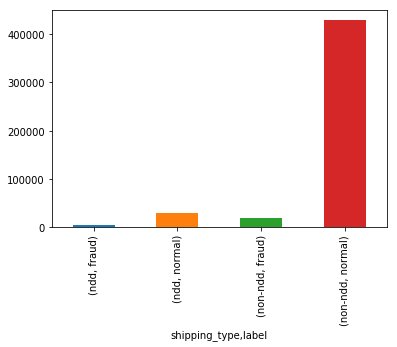

In [68]:
data.groupby(["shipping_type","label"]).size().plot(kind='bar')

In [105]:
def percent_groupby(column, label, data, overall_percent):
    df = data.groupby([column, label]).size().reset_index()
    df.columns = [column, label, "count"]
    k = pd.pivot_table(df, index=column, columns=label, values="count")
    k["fraud_percent"] = k["fraud"] / (k["fraud"] + k["normal"])
    k["normal_percent"] = k["normal"] / (k["fraud"] + k["normal"])
    k["is_greator_than_overall"] = (k["fraud_percent"] > overall_percent).apply(lambda x: "yes" if x == True else "no")
    return k, k[k["is_greator_than_overall"] == "yes"]

In [109]:
shipping, shipping_moreFraud = percent_groupby("shipping_type", "label", data, 0.048)
print("overall destribution per class  \n {} \n distribution for cases where fraud is more than average  \n {} \n".format(shipping, shipping_moreFraud))
vertical, vertical_moreFraud = percent_groupby("vertical", "label", data, 0.048)
print("overall destribution per class  \n {} \n distribution for cases where fraud is more than average  \n {}".format(vertical, vertical_moreFraud))


overall destribution per class  
 label          fraud  normal  fraud_percent  normal_percent is_greator_than_overall
shipping_type                                                                      
ndd             3867   30217       0.113455        0.886545                     yes
non-ndd        18213  428810       0.040743        0.959257                      no 
 distribution for cases where fraud is more than average  
 label          fraud  normal  fraud_percent  normal_percent is_greator_than_overall
shipping_type                                                                      
ndd             3867   30217       0.113455        0.886545                     yes 

overall destribution per class  
 label                              fraud    normal  fraud_percent  normal_percent is_greator_than_overall
vertical                                                                                                 
BloodPressureMonitor                 2.0     943.0       0.002116    

From above analysis, we can see that fraud cases are more when shipping_type = "ndd"
Also, on analysis of verticals, we find that fraud is higher than average for 6 verticals
out of those 6 verticals, we can consider "ExternalHardDisk" , "Handset", "Laptop", "MobileTabletWithCallFacility" and "MobileTabletWithoutCallFacility"

In [12]:
def create_dummy(data, column, label):
    new_column = "is_" + label
    data[new_column] = (data[column] == label).astype(int)

In [13]:
create_dummy(data, "vertical", "ExternalHardDisk")
create_dummy(data, "vertical", "Handset")
create_dummy(data, "vertical", "Laptop")
create_dummy(data, "vertical", "MobileTabletWithCallFacility")
create_dummy(data, "vertical", "MobileTabletWithoutCallFacility")
data.head()

,quantity,selling_price,order_date,shipping_type,user_account_created_date,vertical,discount,count_14_days,count_28_days,count_56_days,category_purchase_count_bks,category_purchase_count_X4kt,category_purchase_count_X4rr,category_purchase_count_dep,category_purchase_count_kyh,category_purchase_count_mgl,category_purchase_count_dgv,category_purchase_count_ixq,category_purchase_count_X26x,category_purchase_count_t06,category_purchase_count_amz,category_purchase_count_reh,category_purchase_count_ckf,category_purchase_count_j9e,category_purchase_count_jek,category_purchase_count_tyy,category_purchase_count_vdm,category_purchase_count_X6bo,category_purchase_count_X2oq,category_purchase_count_mcr,category_purchase_count_osp,category_purchase_count_r18,label,is_ExternalHardDisk,is_Handset,is_Laptop,is_MobileTabletWithCallFacility,is_MobileTabletWithoutCallFacility
0,1,5507,2014-05-24,non-ndd,2012-08-13 06:04:03,Handset,18.942,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,0,1,0,0,0
1,1,6999,2014-05-23,ndd,2012-04-25 09:08:45,Handset,1.946,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,0,1,0,0,0
2,1,5589,2014-05-28,non-ndd,2012-08-10 18:44:49,MobileTabletWithCallFacility,28.819,1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,0,0,0,1,0
3,1,79,2014-05-27,non-ndd,2012-10-19 00:56:02,Book,25.760,2,2,2,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,26.0,0.0,2.0,1.0,0.0,1.0,16.0,0.0,3.0,7.0,0.0,1.0,2.0,normal,0,0,0,0,0
4,1,147,2014-05-27,non-ndd,2012-10-19 00:56:02,Book,35.119,1,1,1,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,26.0,0.0,2.0,1.0,0.0,1.0,16.0,0.0,3.0,7.0,0.0,1.0,2.0,normal,0,0,0,0,0


Analysing continous variables

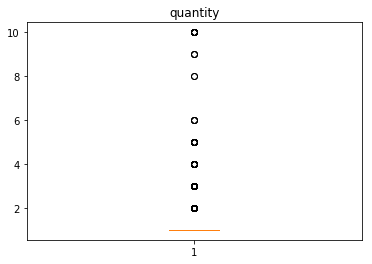

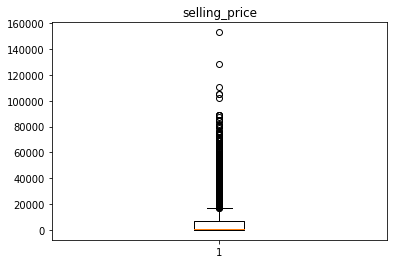

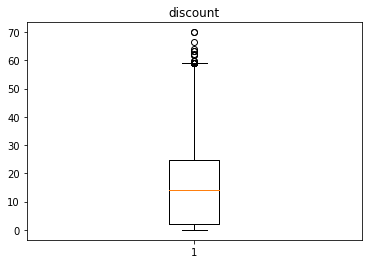

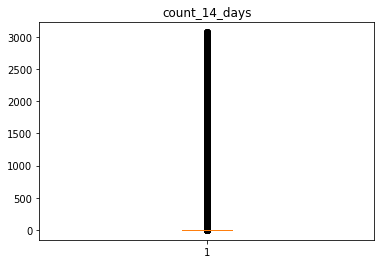

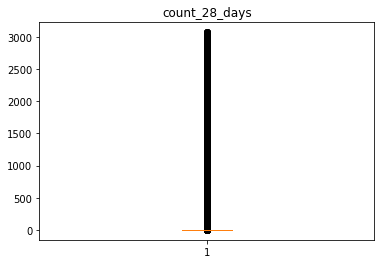

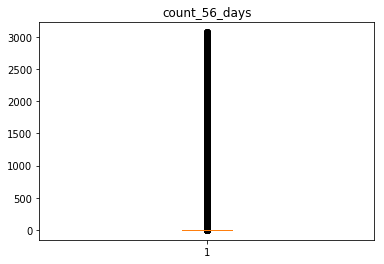

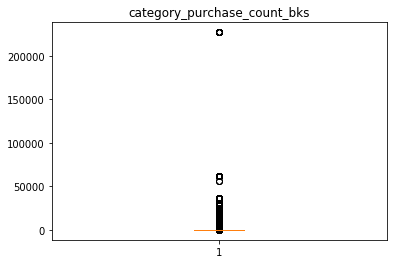

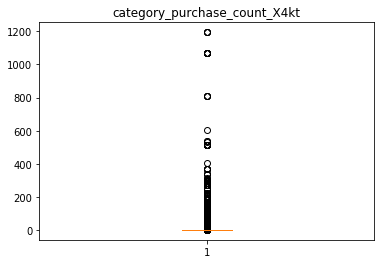

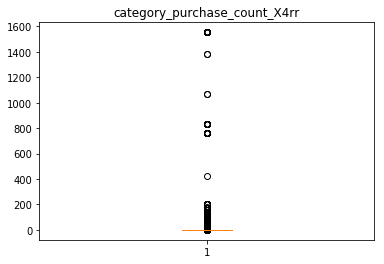

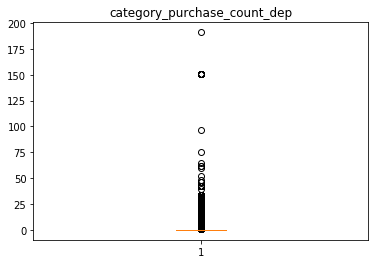

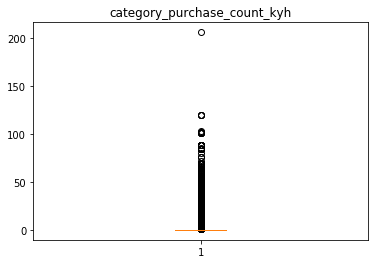

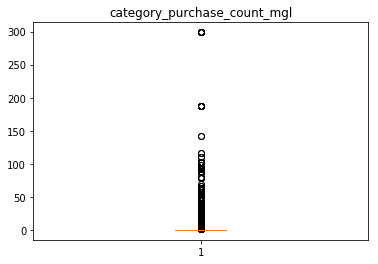

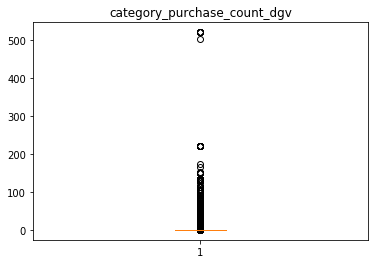

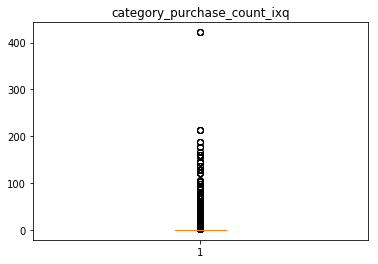

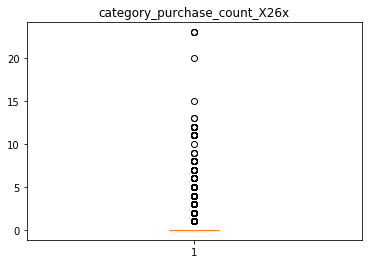

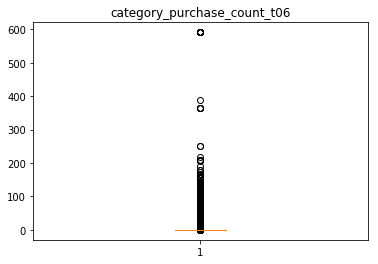

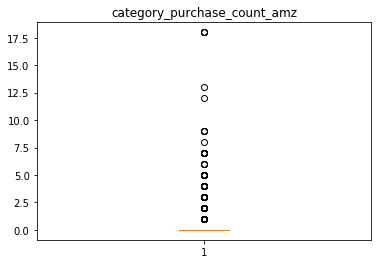

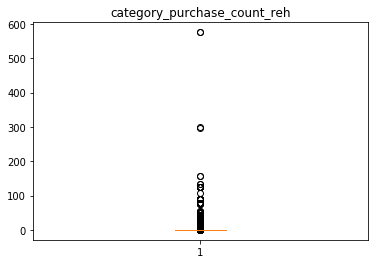

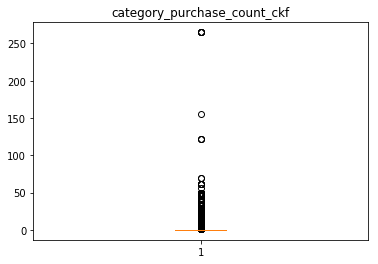

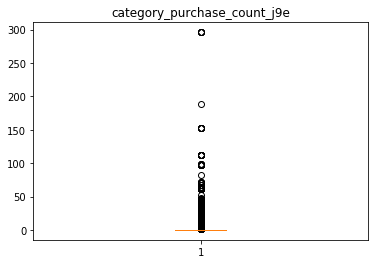

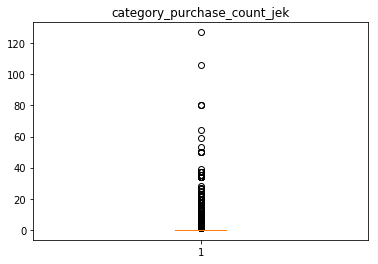

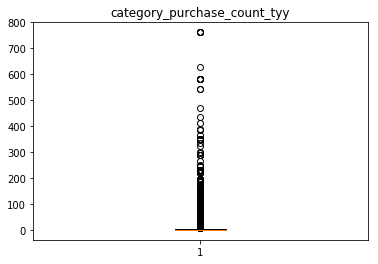

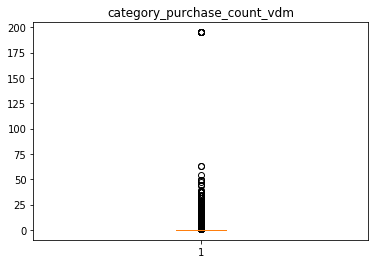

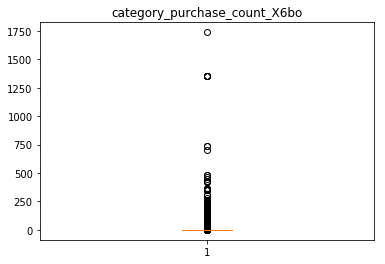

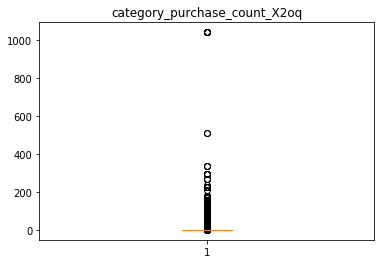

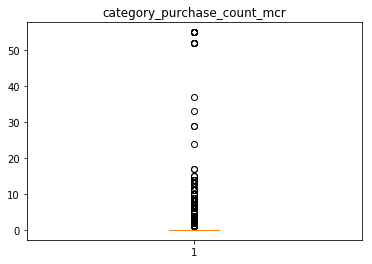

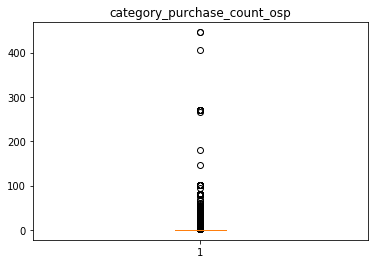

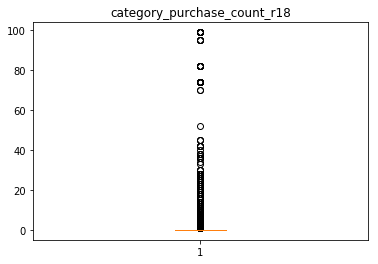

In [122]:

col = ['quantity', 'selling_price','discount', 'count_14_days', 'count_28_days', 'count_56_days', 
       'category_purchase_count_bks', 'category_purchase_count_X4kt', 'category_purchase_count_X4rr', 
       'category_purchase_count_dep', 'category_purchase_count_kyh', 'category_purchase_count_mgl', 
       'category_purchase_count_dgv', 'category_purchase_count_ixq', 'category_purchase_count_X26x', 
       'category_purchase_count_t06', 'category_purchase_count_amz', 'category_purchase_count_reh', 
       'category_purchase_count_ckf', 'category_purchase_count_j9e', 'category_purchase_count_jek', 
       'category_purchase_count_tyy', 'category_purchase_count_vdm', 'category_purchase_count_X6bo', 
       'category_purchase_count_X2oq', 'category_purchase_count_mcr', 'category_purchase_count_osp', 
       'category_purchase_count_r18']

for c in col:
    plt.boxplot(data[c])
    plt.title(c)
    plt.show()

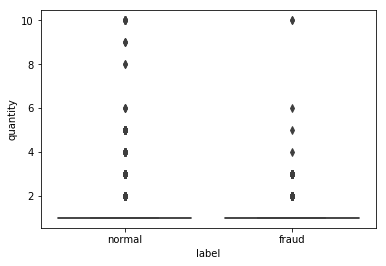

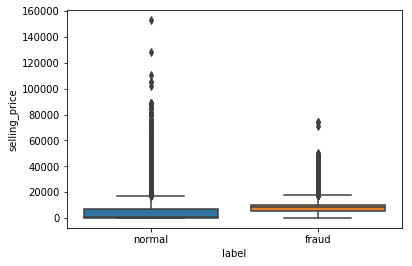

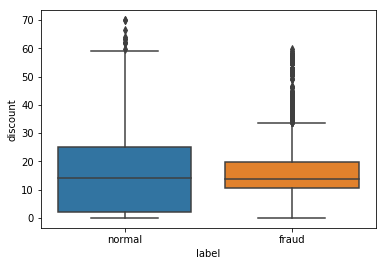

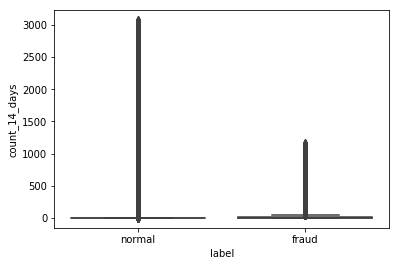

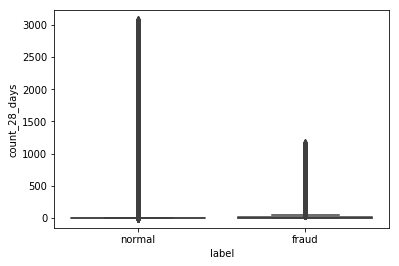

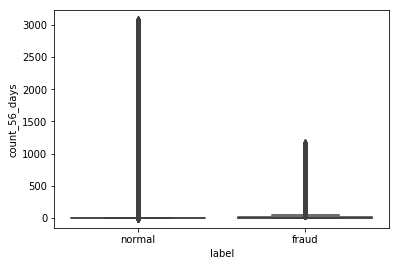

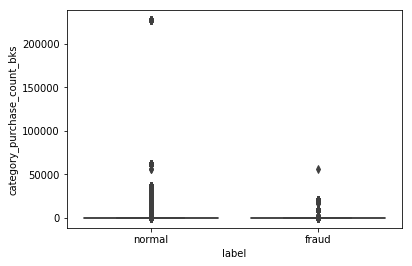

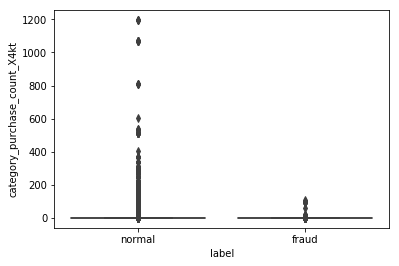

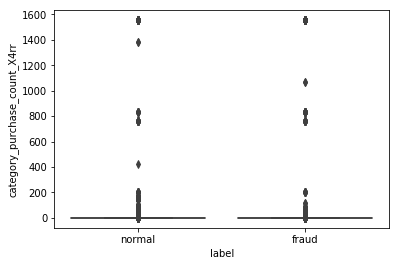

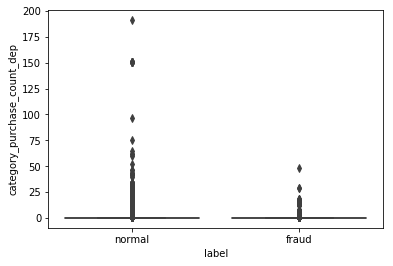

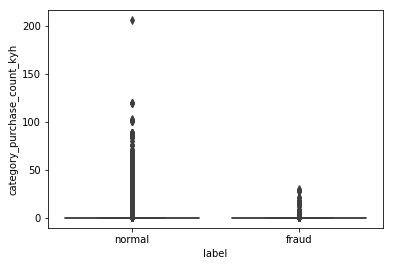

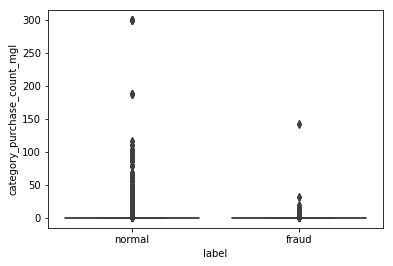

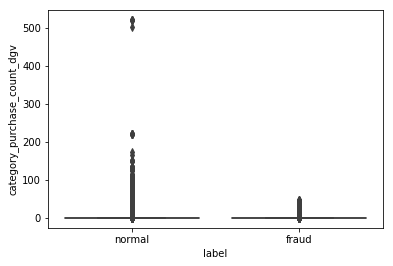

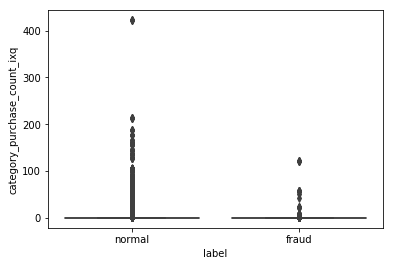

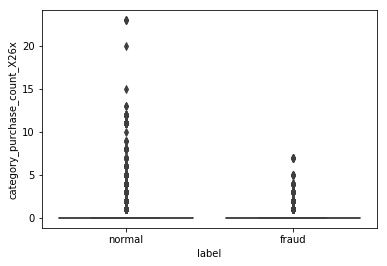

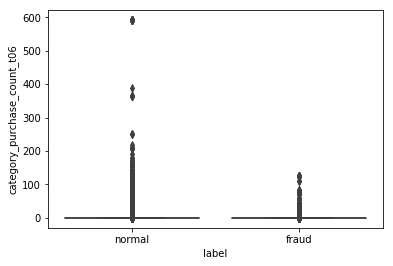

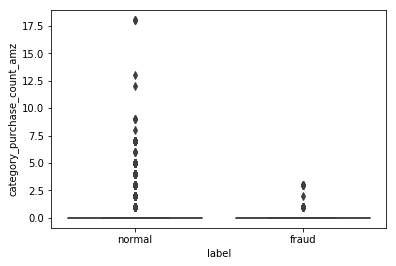

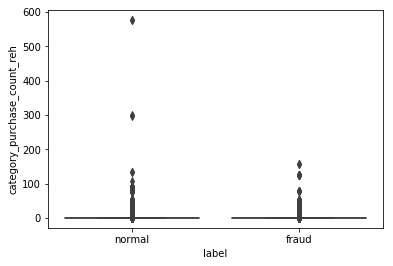

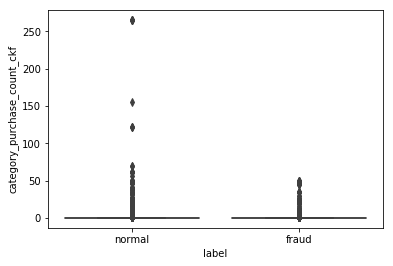

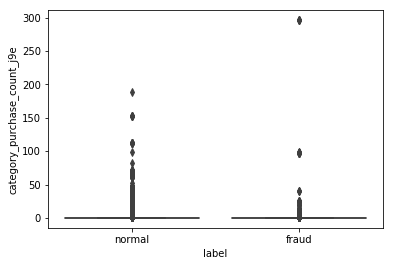

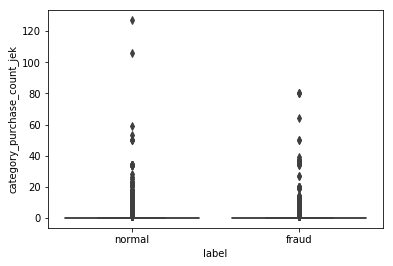

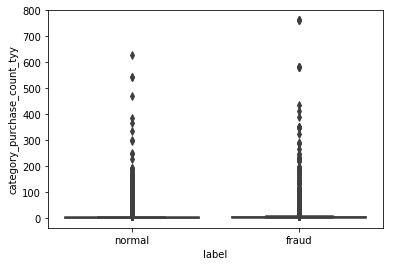

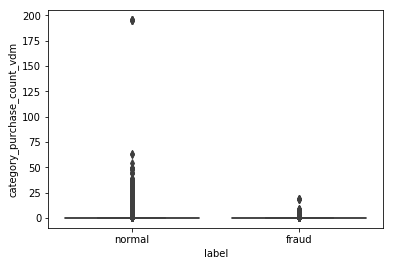

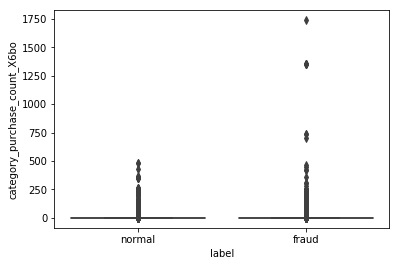

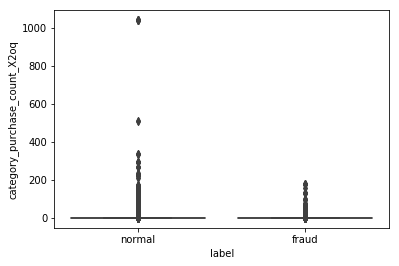

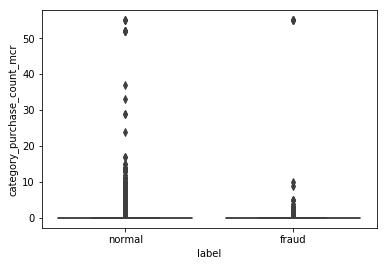

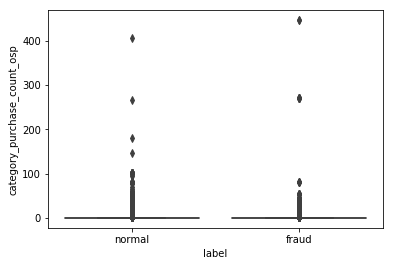

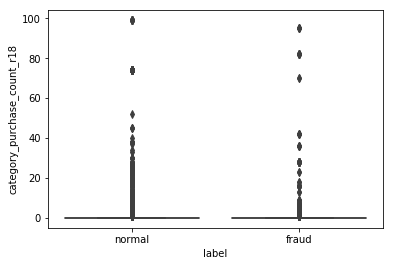

In [124]:
col = ['quantity', 'selling_price','discount', 'count_14_days', 'count_28_days', 'count_56_days', 
       'category_purchase_count_bks', 'category_purchase_count_X4kt', 'category_purchase_count_X4rr', 
       'category_purchase_count_dep', 'category_purchase_count_kyh', 'category_purchase_count_mgl', 
       'category_purchase_count_dgv', 'category_purchase_count_ixq', 'category_purchase_count_X26x', 
       'category_purchase_count_t06', 'category_purchase_count_amz', 'category_purchase_count_reh', 
       'category_purchase_count_ckf', 'category_purchase_count_j9e', 'category_purchase_count_jek', 
       'category_purchase_count_tyy', 'category_purchase_count_vdm', 'category_purchase_count_X6bo', 
       'category_purchase_count_X2oq', 'category_purchase_count_mcr', 'category_purchase_count_osp', 
       'category_purchase_count_r18']

for c in col:
    sns.boxplot(x="label", y=c, data=data)
    plt.show()

In [126]:
col = ['quantity', 'selling_price','discount', 'count_14_days', 'count_28_days', 'count_56_days', 
       'category_purchase_count_bks', 'category_purchase_count_X4kt', 'category_purchase_count_X4rr', 
       'category_purchase_count_dep', 'category_purchase_count_kyh', 'category_purchase_count_mgl', 
       'category_purchase_count_dgv', 'category_purchase_count_ixq', 'category_purchase_count_X26x', 
       'category_purchase_count_t06', 'category_purchase_count_amz', 'category_purchase_count_reh', 
       'category_purchase_count_ckf', 'category_purchase_count_j9e', 'category_purchase_count_jek', 
       'category_purchase_count_tyy', 'category_purchase_count_vdm', 'category_purchase_count_X6bo', 
       'category_purchase_count_X2oq', 'category_purchase_count_mcr', 'category_purchase_count_osp', 
       'category_purchase_count_r18']

for c in col:
    print("distribution of variable {} \n {}".format(c,data[c].groupby(data["label"]).describe()))

distribution of variable quantity 
            count      mean       std  min  25%  50%  75%   max
label                                                         
fraud    22080.0  1.083062  0.400398  1.0  1.0  1.0  1.0  10.0
normal  459027.0  1.077128  0.365321  1.0  1.0  1.0  1.0  10.0
distribution of variable selling_price 
            count          mean           std   min     25%     50%      75%       max
label                                                                                
fraud    22080.0  10940.869384  11224.294413  33.0  5285.0  8599.0  10299.0   73956.0
normal  459027.0   4009.461955   6617.911332   1.0   203.0   500.0   6999.0  152955.0
distribution of variable discount 
            count       mean        std  min     25%     50%     75%     max
label                                                                      
fraud    22080.0  17.134319  14.044685  0.0  10.528  13.825  19.754  59.619
normal  459027.0  15.331197  13.337803  0.0   1.946  14.000  24

distribution of variable category_purchase_count_r18 
            count      mean       std  min  25%  50%  75%   max
label                                                         
fraud    22080.0  0.163315  2.559134  0.0  0.0  0.0  0.0  95.0
normal  459027.0  0.127757  1.170902  0.0  0.0  0.0  0.0  99.0


In [14]:
from datetime import datetime

In [15]:
data["order_date"] = pd.to_datetime(data["order_date"])
data["user_account_created_date"] = pd.to_datetime(data["user_account_created_date"])

In [16]:
data["days_since_last_order"] = (pd.to_datetime("now") - data["order_date"]).dt.days
data["tenure_days"] = (pd.to_datetime("now") - data["user_account_created_date"]).dt.days

In [157]:
data.head()

,quantity,selling_price,order_date,shipping_type,user_account_created_date,vertical,discount,count_14_days,count_28_days,count_56_days,category_purchase_count_bks,category_purchase_count_X4kt,category_purchase_count_X4rr,category_purchase_count_dep,category_purchase_count_kyh,category_purchase_count_mgl,category_purchase_count_dgv,category_purchase_count_ixq,category_purchase_count_X26x,category_purchase_count_t06,category_purchase_count_amz,category_purchase_count_reh,category_purchase_count_ckf,category_purchase_count_j9e,category_purchase_count_jek,category_purchase_count_tyy,category_purchase_count_vdm,category_purchase_count_X6bo,category_purchase_count_X2oq,category_purchase_count_mcr,category_purchase_count_osp,category_purchase_count_r18,label,is_ExternalHardDisk,is_Handset,is_Laptop,is_MobileTabletWithCallFacility,is_MobileTabletWithoutCallFacility,days_since_last_order,tenure_days,user_account_created_date_1
0,1,5507,2014-05-24,non-ndd,2012-08-13 06:04:03,Handset,18.942,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,0,1,0,0,0,1864,2513,2012-08-13 06:04:03
1,1,6999,2014-05-23,ndd,2012-04-25 09:08:45,Handset,1.946,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,0,1,0,0,0,1865,2623,2012-04-25 09:08:45
2,1,5589,2014-05-28,non-ndd,2012-08-10 18:44:49,MobileTabletWithCallFacility,28.819,1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,0,0,0,1,0,1860,2515,2012-08-10 18:44:49
3,1,79,2014-05-27,non-ndd,2012-10-19 00:56:02,Book,25.760,2,2,2,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,26.0,0.0,2.0,1.0,0.0,1.0,16.0,0.0,3.0,7.0,0.0,1.0,2.0,normal,0,0,0,0,0,1861,2446,2012-10-19 00:56:02
4,1,147,2014-05-27,non-ndd,2012-10-19 00:56:02,Book,35.119,1,1,1,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,26.0,0.0,2.0,1.0,0.0,1.0,16.0,0.0,3.0,7.0,0.0,1.0,2.0,normal,0,0,0,0,0,1861,2446,2012-10-19 00:56:02


In [158]:
data[["days_since_last_order", "tenure_days"]].describe()

,days_since_last_order,tenure_days
count,481107.000000,481107.000000
mean,1862.424166,2318.229685
std,3.459019,451.370068
min,1857.000000,1856.000000
25%,1859.000000,1889.000000
50%,1862.000000,2213.000000
75%,1865.000000,2636.000000
max,1868.000000,5294.000000


In [159]:
data["days_since_last_order"].groupby(data["label"]).describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
fraud,22080.0,1862.182790,3.292855,1857.0,1860.0,1861.0,1865.0,1868.0
normal,459027.0,1862.435776,3.466391,1857.0,1859.0,1862.0,1865.0,1868.0


In [160]:
data["tenure_days"].groupby(data["label"]).describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
fraud,22080.0,2001.090082,288.424068,1856.0,1860.0,1867.0,1986.0,5294.0
normal,459027.0,2333.484653,452.175795,1856.0,1902.0,2240.0,2653.0,5294.0


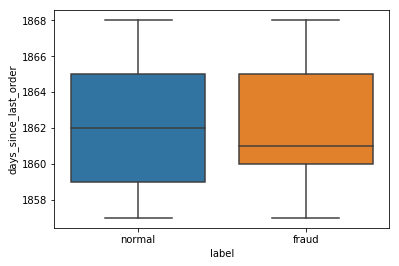

In [161]:
sns.boxplot(x="label", y="days_since_last_order", data=data)
plt.show()

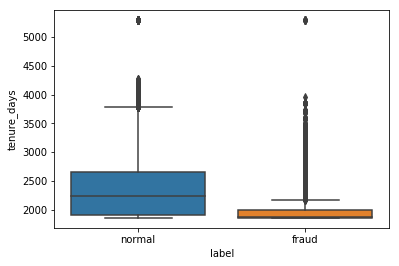

In [162]:
sns.boxplot(x="label", y="tenure_days", data=data)
plt.show()

We can use tenure in our model

In [164]:
data.columns

Index(['quantity', 'selling_price', 'order_date', 'shipping_type', 'user_account_created_date', 'vertical', 'discount', 'count_14_days', 'count_28_days', 'count_56_days', 'category_purchase_count_bks', 'category_purchase_count_X4kt', 'category_purchase_count_X4rr', 'category_purchase_count_dep', 'category_purchase_count_kyh', 'category_purchase_count_mgl', 'category_purchase_count_dgv', 'category_purchase_count_ixq', 'category_purchase_count_X26x', 'category_purchase_count_t06', 'category_purchase_count_amz', 'category_purchase_count_reh', 'category_purchase_count_ckf', 'category_purchase_count_j9e', 'category_purchase_count_jek', 'category_purchase_count_tyy', 'category_purchase_count_vdm', 'category_purchase_count_X6bo', 'category_purchase_count_X2oq', 'category_purchase_count_mcr', 'category_purchase_count_osp', 'category_purchase_count_r18', 'label', 'is_ExternalHardDisk', 'is_Handset', 'is_Laptop', 'is_MobileTabletWithCallFacility', 'is_MobileTabletWithoutCallFacility',
       'da

In [17]:
final_df = data[['quantity', 'selling_price','shipping_type','discount', 'count_14_days', 'count_28_days', 
                 'count_56_days', 'category_purchase_count_bks', 'category_purchase_count_X4kt', 
                 'category_purchase_count_X4rr', 'category_purchase_count_dep', 'category_purchase_count_kyh', 
                 'category_purchase_count_mgl', 'category_purchase_count_dgv', 'category_purchase_count_ixq', 
                 'category_purchase_count_X26x', 'category_purchase_count_t06', 'category_purchase_count_amz', 
                 'category_purchase_count_reh', 'category_purchase_count_ckf', 'category_purchase_count_j9e', 
                 'category_purchase_count_jek', 'category_purchase_count_tyy', 'category_purchase_count_vdm', 
                 'category_purchase_count_X6bo', 'category_purchase_count_X2oq', 'category_purchase_count_mcr', 
                 'category_purchase_count_osp', 'category_purchase_count_r18', 'is_ExternalHardDisk', 
                 'is_Handset', 'is_Laptop', 'is_MobileTabletWithCallFacility', 'is_MobileTabletWithoutCallFacility','tenure_days']]

In [18]:
x_dummy = pd.get_dummies(final_df)

In [19]:
x_dummy.shape

(481107, 36)

In [21]:
y = [0 if x == "normal" else 1 for x in data["label"]]

In [22]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x_dummy.values, y, test_size=0.2, stratify=y)

In [23]:
print(x_train_val.shape)
print(x_test.shape)

(384885, 36)
(96222, 36)


In [24]:
print(Counter(y_train_val))
print(Counter(y_test))

Counter({0: 367221, 1: 17664})
Counter({0: 91806, 1: 4416})


In [25]:
rus = RandomUnderSampler(random_state=42, ratio={0:44160, 1:17664})
X_res, y_res = rus.fit_sample(x_train_val, y_train_val)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 44160, 1: 17664})


In [51]:
params = {'penalty':['l1', 'l2'], 'C':[1, 2, 3, 5]}

lr = LogisticRegression(verbose=1)
clf = GridSearchCV(lr, param_grid = params, verbose=1, n_jobs = -1, cv=2)
clf.fit(X_res, y_res)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   12.6s finished


Best score: 0.8609601449275363
Best parameters: {'C': 1, 'penalty': 'l1'}


In [26]:
log_best = clf.best_estimator_

In [27]:
y_pred = log_best.predict(x_test)

In [28]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.91      0.95     91806
          1       0.28      0.74      0.41      4416

avg / total       0.95      0.90      0.92     96222



In [29]:
y_pred = log_best.predict_proba(x_test)[:, 1]

In [30]:
def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.7]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.5
             precision    recall  f1-score   support

          0       0.99      0.91      0.95     91806
          1       0.28      0.74      0.41      4416

avg / total       0.95      0.90      0.92     96222

0.52
             precision    recall  f1-score   support

          0       0.98      0.92      0.95     91806
          1       0.30      0.71      0.42      4416

avg / total       0.95      0.91      0.93     96222

0.54
             precision    recall  f1-score   support

          0       0.98      0.93      0.96     91806
          1       0.32      0.67      0.43      4416

avg / total       0.95      0.92      0.93     96222

0.56
             precision    recall  f1-score   support

          0       0.98      0.94      0.96     91806
          1       0.33      0.59      0.42      4416

avg / total       0.95      0.93      0.94     96222

0.58
             precision    recall  f1-score   support

          0       0.98      0.95      0.96     91806
         

In [65]:
params = {'n_estimators': [200, 300, 400], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20],
          'max_features': [4, 6, 8]}

rf = RandomForestClassifier()
clf = GridSearchCV(rf, param_grid=params, n_jobs=-1, verbose=1, cv=2)
clf.fit(X_res, y_res)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_)) 

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 24.6min finished


Best score: 0.9297360248447205
Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 8, 'n_estimators': 400}


In [31]:
rf_best = clf.best_estimator_

In [32]:
y_pred = rf_best.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.96      0.98     91806
          1       0.53      0.84      0.65      4416

avg / total       0.97      0.96      0.96     96222



In [33]:
y_pred = rf_best.predict_proba(x_test)[:, 1]

In [34]:
def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.3, 0.4, 0.5, 0.54, 0.6, 0.7, 0.8, 0.85, 0.9]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.3
             precision    recall  f1-score   support

          0       0.99      0.93      0.96     91806
          1       0.38      0.90      0.53      4416

avg / total       0.97      0.93      0.94     96222

0.4
             precision    recall  f1-score   support

          0       0.99      0.95      0.97     91806
          1       0.46      0.88      0.61      4416

avg / total       0.97      0.95      0.96     96222

0.5
             precision    recall  f1-score   support

          0       0.99      0.96      0.98     91806
          1       0.53      0.84      0.65      4416

avg / total       0.97      0.96      0.96     96222

0.54
             precision    recall  f1-score   support

          0       0.99      0.97      0.98     91806
          1       0.56      0.83      0.67      4416

avg / total       0.97      0.96      0.97     96222

0.6
             precision    recall  f1-score   support

          0       0.99      0.97      0.98     91806
          1 

In [27]:
params = {'n_estimators': [200, 300, 400], 'learning_rate': [0.1, 0.5], 'loss': ["deviance", "exponential"], 
          'max_features':[4, 6, 8]}

gbm = GradientBoostingClassifier(verbose=1)
clf = GridSearchCV(gbm, param_grid=params, n_jobs=-1, verbose=1, cv=2)
clf.fit(X_res, y_res)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_)) 

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  3.6min finished


      Iter       Train Loss   Remaining Time 
         1           0.7303           20.88s
         2           0.6667           20.15s
         3           0.5975           17.54s
         4           0.5638           17.76s
         5           0.5451           17.13s
         6           0.5256           17.19s
         7           0.5158           17.16s
         8           0.5104           16.40s
         9           0.5034           15.90s
        10           0.4995           15.49s
        20           0.4643           13.97s
        30           0.4435           13.59s
        40           0.4311           13.42s
        50           0.4214           12.81s
        60           0.4144           12.35s
        70           0.4087           11.89s
        80           0.4032           12.02s
        90           0.3982           11.69s
       100           0.3934           11.24s
       200           0.3590            7.21s
       300           0.3359            3.62s
       40

In [35]:
gbm_best = clf.best_estimator_

In [36]:
y_pred = gbm_best.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.96      0.98     91806
          1       0.51      0.84      0.63      4416

avg / total       0.97      0.96      0.96     96222



In [37]:
y_pred = gbm_best.predict_proba(x_test)[:, 1]

In [38]:
def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.3, 0.4, 0.5, 0.54, 0.6, 0.7, 0.8, 0.85, 0.9]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.3
             precision    recall  f1-score   support

          0       0.99      0.93      0.96     91806
          1       0.38      0.89      0.53      4416

avg / total       0.97      0.93      0.94     96222

0.4
             precision    recall  f1-score   support

          0       0.99      0.95      0.97     91806
          1       0.45      0.87      0.59      4416

avg / total       0.97      0.94      0.95     96222

0.5
             precision    recall  f1-score   support

          0       0.99      0.96      0.98     91806
          1       0.51      0.84      0.63      4416

avg / total       0.97      0.96      0.96     96222

0.54
             precision    recall  f1-score   support

          0       0.99      0.97      0.98     91806
          1       0.53      0.82      0.65      4416

avg / total       0.97      0.96      0.96     96222

0.6
             precision    recall  f1-score   support

          0       0.99      0.97      0.98     91806
          1 

In [42]:
params = {'activation':['logistic','relu'], 'hidden_layer_sizes':[10,15,25], 'alpha':[1e-4, 1e-3, 1e-2, 1e-1], 
          'solver':['lbfgs','sgd', 'adam'], 'learning_rate':['adaptive']}

nnet = MLPClassifier(verbose=True)
clf = GridSearchCV(nnet, param_grid=params, verbose=1, cv=2)
clf.fit(X_res, y_res)

print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Fitting 2 folds for each of 72 candidates, totalling 144 fits
Iteration 1, loss = 0.60627163
Iteration 2, loss = 0.53123806
Iteration 3, loss = 0.50936744
Iteration 4, loss = 0.49766232
Iteration 5, loss = 0.48922154
Iteration 6, loss = 0.48521373
Iteration 7, loss = 0.49206003
Iteration 8, loss = 0.49054089
Iteration 9, loss = 0.48515187
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 10, loss = 0.48339369
Iteration 11, loss = 0.48191287
Iteration 12, loss = 0.48104761
Iteration 13, loss = 0.48056107
Iteration 14, loss = 0.47999781
Iteration 15, loss = 0.48017024
Iteration 16, loss = 0.47909433
Iteration 17, loss = 0.47851397
Iteration 18, loss = 0.47775350
Iteration 19, loss = 0.47747279
Iteration 20, loss = 0.47703478
Iteration 21, loss = 0.47664145
Iteration 22, loss = 0.47631792
Iteration 23, loss = 0.47606558
Iteration 24, loss = 0.47572917
Iteration 25, loss = 0.47519556
Iteration 26, loss = 0.47533444


Iteration 10, loss = 0.47827260
Iteration 11, loss = 0.47218205
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 12, loss = 0.46738114
Iteration 13, loss = 0.46674475
Iteration 14, loss = 0.46665536
Iteration 15, loss = 0.46630459
Iteration 16, loss = 0.46627287
Iteration 17, loss = 0.46611570
Iteration 18, loss = 0.46594575
Iteration 19, loss = 0.46568633
Iteration 20, loss = 0.46563005
Iteration 21, loss = 0.46552041
Iteration 22, loss = 0.46544503
Iteration 23, loss = 0.46519400
Iteration 24, loss = 0.46517992
Iteration 25, loss = 0.46523804
Iteration 26, loss = 0.46518282
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 27, loss = 0.46484532
Iteration 28, loss = 0.46468134
Iteration 29, loss = 0.46460292
Iteration 30, loss = 0.46463835
Iteration 31, loss = 0.46456674
Training loss did not improve more than tol=0.000100 for two conse

Iteration 1, loss = 0.56933842
Iteration 2, loss = 0.46291617
Iteration 3, loss = 0.45089586
Iteration 4, loss = 0.44479789
Iteration 5, loss = 0.44253497
Iteration 6, loss = 0.43582670
Iteration 7, loss = 0.43274427
Iteration 8, loss = 0.43208304
Iteration 9, loss = 0.42559218
Iteration 10, loss = 0.42967176
Iteration 11, loss = 0.42178760
Iteration 12, loss = 0.40529530
Iteration 13, loss = 0.39955068
Iteration 14, loss = 0.40409430
Iteration 15, loss = 0.38740165
Iteration 16, loss = 0.38164200
Iteration 17, loss = 0.38048731
Iteration 18, loss = 0.37342429
Iteration 19, loss = 0.36875781
Iteration 20, loss = 0.36561313
Iteration 21, loss = 0.35933757
Iteration 22, loss = 0.36082441
Iteration 23, loss = 0.35185575
Iteration 24, loss = 0.35769241
Iteration 25, loss = 0.36458180
Iteration 26, loss = 0.38326516
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.65178176
Iteration 2, loss = 0.48028018
Iteration 3, loss = 0.45

Iteration 30, loss = 0.45717188
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 31, loss = 0.45708750
Iteration 32, loss = 0.45706971
Iteration 33, loss = 0.45705924
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 34, loss = 0.45704167
Iteration 35, loss = 0.45704122
Iteration 36, loss = 0.45703773
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 37, loss = 0.45703347
Iteration 38, loss = 0.45703305
Iteration 39, loss = 0.45703255
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.58988649
Iteration 2, loss = 0.51885197
Iteration 3, loss = 0.50052436
Iteration 4, loss = 0.48769381
Iteration 5, loss = 0.48046072
Iteration 6, loss = 0.47545517
Iteration 7, loss = 0.47533526
It

Iteration 16, loss = 0.40058503
Iteration 17, loss = 0.38582368
Iteration 18, loss = 0.37365020
Iteration 19, loss = 0.38015448
Iteration 20, loss = 0.36976655
Iteration 21, loss = 0.36402741
Iteration 22, loss = 0.37944186
Iteration 23, loss = 0.36763233
Iteration 24, loss = 0.37731872
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.52262187
Iteration 2, loss = 0.46113511
Iteration 3, loss = 0.44757711
Iteration 4, loss = 0.44600300
Iteration 5, loss = 0.44357562
Iteration 6, loss = 0.44092203
Iteration 7, loss = 0.43643656
Iteration 8, loss = 0.43611417
Iteration 9, loss = 0.43273506
Iteration 10, loss = 0.43379658
Iteration 11, loss = 0.43189837
Iteration 12, loss = 0.42817896
Iteration 13, loss = 0.42655260
Iteration 14, loss = 0.41992229
Iteration 15, loss = 0.41790496
Iteration 16, loss = 0.42072957
Iteration 17, loss = 0.42060391
Iteration 18, loss = 0.41349346
Iteration 19, loss = 0.42162517
Iteration 20, loss = 0

Iteration 50, loss = 0.46321916
Iteration 51, loss = 0.46321652
Iteration 52, loss = 0.46321618
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 53, loss = 0.46321210
Iteration 54, loss = 0.46321161
Iteration 55, loss = 0.46321118
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.58490064
Iteration 2, loss = 0.49902241
Iteration 3, loss = 0.48470413
Iteration 4, loss = 0.47814354
Iteration 5, loss = 0.47372091
Iteration 6, loss = 0.47141792
Iteration 7, loss = 0.47055693
Iteration 8, loss = 0.46946372
Iteration 9, loss = 0.46870487
Iteration 10, loss = 0.46877475
Iteration 11, loss = 0.46746932
Iteration 12, loss = 0.46644772
Iteration 13, loss = 0.46613835
Iteration 14, loss = 0.46723731
Iteration 15, loss = 0.46673853
Iteration 16, loss = 0.46707466
Training loss did not improve more than tol=0.000100 for two consecutive e

Iteration 31, loss = 0.45919466
Iteration 32, loss = 0.45919367
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 33, loss = 0.45918971
Iteration 34, loss = 0.45918950
Iteration 35, loss = 0.45918951
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.58040113
Iteration 2, loss = 0.48145348
Iteration 3, loss = 0.45482018
Iteration 4, loss = 0.44898682
Iteration 5, loss = 0.44468436
Iteration 6, loss = 0.44277837
Iteration 7, loss = 0.44085934
Iteration 8, loss = 0.44057705
Iteration 9, loss = 0.43986092
Iteration 10, loss = 0.43976780
Iteration 11, loss = 0.43409230
Iteration 12, loss = 0.43124988
Iteration 13, loss = 0.43637103
Iteration 14, loss = 0.43273559
Iteration 15, loss = 0.43443827
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.53999923
Iteration 2, los

Iteration 20, loss = 0.46301776
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 21, loss = 0.46259019
Iteration 22, loss = 0.46251190
Iteration 23, loss = 0.46245203
Iteration 24, loss = 0.46234415
Iteration 25, loss = 0.46234980
Iteration 26, loss = 0.46240599
Iteration 27, loss = 0.46217530
Iteration 28, loss = 0.46208230
Iteration 29, loss = 0.46215362
Iteration 30, loss = 0.46207165
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 31, loss = 0.46200270
Iteration 32, loss = 0.46199275
Iteration 33, loss = 0.46198868
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 34, loss = 0.46198047
Iteration 35, loss = 0.46197950
Iteration 36, loss = 0.46197779
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000

Iteration 1, loss = 0.49501854
Iteration 2, loss = 0.45151926
Iteration 3, loss = 0.44502328
Iteration 4, loss = 0.44821949
Iteration 5, loss = 0.43761033
Iteration 6, loss = 0.43142688
Iteration 7, loss = 0.43051766
Iteration 8, loss = 0.42891306
Iteration 9, loss = 0.42442023
Iteration 10, loss = 0.42394019
Iteration 11, loss = 0.41423958
Iteration 12, loss = 0.40253191
Iteration 13, loss = 0.40343882
Iteration 14, loss = 0.39236711
Iteration 15, loss = 0.39291761
Iteration 16, loss = 0.39726115
Iteration 17, loss = 0.39560796
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.50550443
Iteration 2, loss = 0.46082870
Iteration 3, loss = 0.45165478
Iteration 4, loss = 0.43818888
Iteration 5, loss = 0.43271659
Iteration 6, loss = 0.42649070
Iteration 7, loss = 0.41969785
Iteration 8, loss = 0.41814779
Iteration 9, loss = 0.40813304
Iteration 10, loss = 0.40034705
Iteration 11, loss = 0.40014453
Iteration 12, loss = 0.41498514

Iteration 27, loss = 0.59866384
Iteration 28, loss = 0.59866384
Iteration 29, loss = 0.59866384
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 4.11518420
Iteration 2, loss = 2.17746850
Iteration 3, loss = 1.61598599
Iteration 4, loss = 1.23839177
Iteration 5, loss = 1.48098796
Iteration 6, loss = 1.41898941
Iteration 7, loss = 1.01355029
Iteration 8, loss = 0.81479026
Iteration 9, loss = 1.19871574
Iteration 10, loss = 0.86047478
Iteration 11, loss = 1.07599791
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 5.03015516
Iteration 2, loss = 1.36822215
Iteration 3, loss = 0.78243613
Iteration 4, loss = 0.83802592
Iteration 5, loss = 0.81381331
Iteration 6, loss = 0.77559675
Iteration 7, loss = 0.67260987
Iteration 8, loss = 0.65114199
Iteration 9, loss = 0.81500220
Iteration 10, loss = 0.67045640
Iteration 11, loss = 0.66319277
Training lo

Iteration 1, loss = 7.42189724
Iteration 2, loss = 3.01219587
Iteration 3, loss = 1.18769401
Iteration 4, loss = 1.08831726
Iteration 5, loss = 1.05048880
Iteration 6, loss = 1.00939477
Iteration 7, loss = 0.90530002
Iteration 8, loss = 0.83312558
Iteration 9, loss = 0.70725342
Iteration 10, loss = 0.62563739
Iteration 11, loss = 0.57759165
Iteration 12, loss = 0.58312879
Iteration 13, loss = 0.52039012
Iteration 14, loss = 0.50573472
Iteration 15, loss = 0.47216590
Iteration 16, loss = 0.48987974
Iteration 17, loss = 0.43862052
Iteration 18, loss = 0.46746344
Iteration 19, loss = 0.45844031
Iteration 20, loss = 0.50966492
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 4.53487717
Iteration 2, loss = 1.12138099
Iteration 3, loss = 0.89644882
Iteration 4, loss = 0.68877331
Iteration 5, loss = 0.79597677
Iteration 6, loss = 0.83677819
Iteration 7, loss = 0.72680766
Training loss did not improve more than tol=0.000100 for two 

Iteration 90, loss = 1.47324547
Iteration 91, loss = 1.47310899
Iteration 92, loss = 1.47297356
Iteration 93, loss = 1.47283933
Iteration 94, loss = 1.47270419
Iteration 95, loss = 1.47256566
Iteration 96, loss = 1.47242871
Iteration 97, loss = 1.47229163
Iteration 98, loss = 1.47215581
Iteration 99, loss = 1.47202125
Iteration 100, loss = 1.47188522
Iteration 101, loss = 1.47174674
Iteration 102, loss = 1.47161237
Iteration 103, loss = 1.47147668
Iteration 104, loss = 1.47134030
Iteration 105, loss = 1.47120310
Iteration 106, loss = 1.47107105
Iteration 107, loss = 1.47093259
Iteration 108, loss = 1.47079627
Iteration 109, loss = 1.47065890
Iteration 110, loss = 1.47052344
Iteration 111, loss = 1.47039018
Iteration 112, loss = 1.47025143
Iteration 113, loss = 1.47011882
Iteration 114, loss = 1.46998184
Iteration 115, loss = 1.46984618
Iteration 116, loss = 1.46970965
Iteration 117, loss = 1.46957310
Iteration 118, loss = 1.46944065
Iteration 119, loss = 1.46930487
Iteration 120, loss 

C:\Users\shanu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 0.95252378
Iteration 4, loss = 0.93159955
Iteration 5, loss = 0.92170280
Iteration 6, loss = 0.91687551
Iteration 7, loss = 0.91445096
Iteration 8, loss = 0.91320088
Iteration 9, loss = 0.91255466
Iteration 10, loss = 0.91219989
Iteration 11, loss = 0.91199417
Iteration 12, loss = 0.91186479
Iteration 13, loss = 0.91176961
Iteration 14, loss = 0.91169835
Iteration 15, loss = 0.91163794
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 16, loss = 0.91159860
Iteration 17, loss = 0.91158748
Iteration 18, loss = 0.91157707
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 19, loss = 0.91156961
Iteration 20, loss = 0.91156760
Iteration 21, loss = 0.91156548
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 22, loss = 0.91156395
Iteration 23, loss = 0

Iteration 167, loss = 1.46314487
Iteration 168, loss = 1.46301159
Iteration 169, loss = 1.46287738
Iteration 170, loss = 1.46274166
Iteration 171, loss = 1.46260926
Iteration 172, loss = 1.46247239
Iteration 173, loss = 1.46233846
Iteration 174, loss = 1.46220420
Iteration 175, loss = 1.46207177
Iteration 176, loss = 1.46193637
Iteration 177, loss = 1.46179929
Iteration 178, loss = 1.46166279
Iteration 179, loss = 1.46152985
Iteration 180, loss = 1.46139542
Iteration 181, loss = 1.46126240
Iteration 182, loss = 1.46112975
Iteration 183, loss = 1.46099226
Iteration 184, loss = 1.46085988
Iteration 185, loss = 1.46072282
Iteration 186, loss = 1.46058899
Iteration 187, loss = 1.46045707
Iteration 188, loss = 1.46032219
Iteration 189, loss = 1.46018844
Iteration 190, loss = 1.46005205
Iteration 191, loss = 1.45991736
Iteration 192, loss = 1.45978221
Iteration 193, loss = 1.45964958
Iteration 194, loss = 1.45951433
Iteration 195, loss = 1.45938101
Iteration 196, loss = 1.45924693
Iteration 

C:\Users\shanu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 4, loss = 0.86218269
Iteration 5, loss = 0.86041314
Iteration 6, loss = 0.85948973
Iteration 7, loss = 0.85901042
Iteration 8, loss = 0.85874252
Iteration 9, loss = 0.85857380
Iteration 10, loss = 0.85847148
Iteration 11, loss = 0.85839704
Iteration 12, loss = 0.85833732
Iteration 13, loss = 0.85828947
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 14, loss = 0.85824040
Iteration 15, loss = 0.85823097
Iteration 16, loss = 0.85822188
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 17, loss = 0.85821256
Iteration 18, loss = 0.85821093
Iteration 19, loss = 0.85820910
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 20, loss = 0.85820725
Iteration 21, loss = 0.85820687
Iteration 22, loss = 0.85820652
Training loss did not improve more than tol=0.000100 

Iteration 192, loss = 1.20964608
Iteration 193, loss = 1.20869251
Iteration 194, loss = 1.20774644
Iteration 195, loss = 1.20679126
Iteration 196, loss = 1.20584389
Iteration 197, loss = 1.20489844
Iteration 198, loss = 1.20395568
Iteration 199, loss = 1.20301198
Iteration 200, loss = 1.20207025
Iteration 1, loss = 3.74833607
Iteration 2, loss = 3.82680478


C:\Users\shanu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 3.80612251
Iteration 4, loss = 3.79362458
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 3.78769611
Iteration 6, loss = 3.78609929
Iteration 7, loss = 3.78459601
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 3.78366000
Iteration 9, loss = 3.78337086
Iteration 10, loss = 3.78308957
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 3.78290857
Iteration 12, loss = 3.78285201
Iteration 13, loss = 3.78279627
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 3.78276045
Iteration 15, loss = 3.78274914
Iteration 16, loss = 3.78273804
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning r

Iteration 2, loss = 2.24185425
Iteration 3, loss = 1.46157343
Iteration 4, loss = 1.45748466
Iteration 5, loss = 1.08890756
Iteration 6, loss = 1.20456565
Iteration 7, loss = 1.04716568
Iteration 8, loss = 0.96506859
Iteration 9, loss = 0.86420352
Iteration 10, loss = 0.94860434
Iteration 11, loss = 1.27114370
Iteration 12, loss = 0.85300084
Iteration 13, loss = 0.93270018
Iteration 14, loss = 1.37578857
Iteration 15, loss = 0.95416503
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 6.43044464
Iteration 2, loss = 1.67751072
Iteration 3, loss = 1.36205719
Iteration 4, loss = 1.29117675
Iteration 5, loss = 1.27510368
Iteration 6, loss = 1.15915967
Iteration 7, loss = 1.15708789
Iteration 8, loss = 0.97654764
Iteration 9, loss = 0.96617992
Iteration 10, loss = 1.05481021
Iteration 11, loss = 0.77200447
Iteration 12, loss = 0.84582869
Iteration 13, loss = 1.07180808
Iteration 14, loss = 0.84293870
Training loss did not improve 

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  5.5min finished



Iteration 2, loss = 1.30432032
Iteration 3, loss = 1.15279574
Iteration 4, loss = 0.90958903
Iteration 5, loss = 0.87389309
Iteration 6, loss = 0.79908336
Iteration 7, loss = 0.75186206
Iteration 8, loss = 0.84088866
Iteration 9, loss = 0.67933045
Iteration 10, loss = 0.65698741
Iteration 11, loss = 0.59953133
Iteration 12, loss = 0.63886948
Iteration 13, loss = 0.57572062
Iteration 14, loss = 0.65274816
Iteration 15, loss = 0.63907267
Iteration 16, loss = 0.53752516
Iteration 17, loss = 0.64247505
Iteration 18, loss = 0.55824399
Iteration 19, loss = 0.61412479
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Best score: 0.8579677795031055
Best parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 15, 'learning_rate': 'adaptive', 'solver': 'adam'}


In [39]:
mlp_best = clf.best_estimator_

In [40]:
y_pred = mlp_best.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.89      0.94     91806
          1       0.26      0.80      0.40      4416

avg / total       0.96      0.89      0.91     96222



In [41]:
y_pred = mlp_best.predict_proba(x_test)[:, 1]

In [42]:
def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.3, 0.4, 0.5, 0.54, 0.6, 0.7, 0.8, 0.85, 0.9]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.3
             precision    recall  f1-score   support

          0       0.99      0.83      0.90     91806
          1       0.19      0.85      0.32      4416

avg / total       0.95      0.83      0.88     96222

0.4
             precision    recall  f1-score   support

          0       0.99      0.87      0.92     91806
          1       0.23      0.83      0.36      4416

avg / total       0.96      0.86      0.90     96222

0.5
             precision    recall  f1-score   support

          0       0.99      0.89      0.94     91806
          1       0.26      0.80      0.40      4416

avg / total       0.96      0.89      0.91     96222

0.54
             precision    recall  f1-score   support

          0       0.99      0.90      0.94     91806
          1       0.28      0.79      0.41      4416

avg / total       0.96      0.90      0.92     96222

0.6
             precision    recall  f1-score   support

          0       0.99      0.92      0.95     91806
          1 

In [39]:
params = {'n_estimators': [100, 200, 400], 'learning_rate': [0.05, 0.1, 0.5], 'max_depth': [5, 10, 20]}

xgb = XGBClassifier(verbosity=1)
clf = GridSearchCV(xgb, param_grid=params, n_jobs=-1, verbose=1, cv=2)
clf.fit(X_res, y_res)

print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  7.4min finished


Best score: 0.9288787525879917
Best parameters: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 400}


In [43]:
xgb_best. = clf.best_estimator_

In [44]:
y_pred = xgb_best.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.96      0.98     91806
          1       0.52      0.86      0.65      4416

avg / total       0.97      0.96      0.96     96222



C:\Users\shanu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [45]:
y_pred = xgb_best.predict_proba(x_test)[:, 1]

In [46]:
def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.3, 0.4, 0.5, 0.54, 0.6, 0.7, 0.8, 0.85, 0.9]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.3
             precision    recall  f1-score   support

          0       1.00      0.94      0.96     91806
          1       0.40      0.90      0.56      4416

avg / total       0.97      0.93      0.95     96222

0.4
             precision    recall  f1-score   support

          0       0.99      0.95      0.97     91806
          1       0.46      0.88      0.61      4416

avg / total       0.97      0.95      0.96     96222

0.5
             precision    recall  f1-score   support

          0       0.99      0.96      0.98     91806
          1       0.52      0.86      0.65      4416

avg / total       0.97      0.96      0.96     96222

0.54
             precision    recall  f1-score   support

          0       0.99      0.97      0.98     91806
          1       0.54      0.85      0.66      4416

avg / total       0.97      0.96      0.96     96222

0.6
             precision    recall  f1-score   support

          0       0.99      0.97      0.98     91806
          1 

In [47]:
# voted_class = VotingClassifier(estimators=[('logistic', log_best),('rf', rf_best), ('gbm', gbm_best),
#                                            ('xgb', xgb_best), ('nnet', mlp_best)], voting='soft', n_jobs=-1)

# voted_class = VotingClassifier(estimators=[('logistic', log_best),('rf', rf_best), ('gbm', gbm_best),
#                                            ('nnet', mlp_best)], voting='soft', n_jobs=-1)

# voted_class = VotingClassifier(estimators=[('logistic', log_best),('rf', rf_best), ('gbm', gbm_best),
#                                            ('xgb', xgb_best)], voting='soft', n_jobs=-1)

voted_class = VotingClassifier(estimators=[('rf', rf_best), ('gbm', gbm_best),
                                           ('xgb', xgb_best)], voting='soft', n_jobs=-1)

voted_class.fit(X_res, y_res)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight...
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1))],
         flatten_transform=None, n_jobs=-1, voting='soft', weights=None)

In [48]:
y_pred = voted_class.predict_proba(x_test)[:, 1]

In [49]:
def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold =  [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.4
             precision    recall  f1-score   support

          0       0.99      0.95      0.97     91806
          1       0.47      0.88      0.61      4416

avg / total       0.97      0.95      0.96     96222

0.5
             precision    recall  f1-score   support

          0       0.99      0.96      0.98     91806
          1       0.53      0.85      0.65      4416

avg / total       0.97      0.96      0.96     96222

0.6
             precision    recall  f1-score   support

          0       0.99      0.97      0.98     91806
          1       0.60      0.82      0.69      4416

avg / total       0.97      0.97      0.97     96222

0.7
             precision    recall  f1-score   support

          0       0.99      0.98      0.99     91806
          1       0.67      0.78      0.72      4416

avg / total       0.97      0.97      0.97     96222

0.8
             precision    recall  f1-score   support

          0       0.99      0.99      0.99     91806
          1  

In [50]:
def Stacking(model, x_train, y_train, test, n_fold):
    folds = StratifiedKFold(n_splits=n_fold)
    test_pred=np.empty((0))
    train_pred = np.empty((0))
    
    for train_idx, val_idx in folds.split(x_train, y_train):
        X_train, X_val, Y_train, Y_val = x_train.iloc[train_idx], x_train.iloc[val_idx], y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model.fit(X_train.values, Y_train)
        pred = model.predict_proba(X_val.values)[:, 1]
        train_pred = np.append(train_pred, pred, axis=0)
        
    pred_test = model.predict_proba(test)[:, 1]   
    test_pred = np.append(test_pred, pred_test, axis=0)
    return test_pred, train_pred

In [51]:
y_res1 = pd.DataFrame(y_res)
y_res1.columns = ["label"]

In [52]:
models = [rf_best, gbm_best, xgb_best]
df_ensemble_train = pd.DataFrame()
df_ensemble_test = pd.DataFrame()

X_res = pd.DataFrame(X_res)
X_res.columns = x_dummy.columns

for model in models:
    print(model)
    test_pred, train_pred = Stacking(model, X_res, y_res1, x_test, 2)
    
    test_df = pd.DataFrame(test_pred)
    train_df = pd.DataFrame(train_pred)
    
    df_ensemble_train = pd.concat([df_ensemble_train, train_df], axis=1)
    df_ensemble_test = pd.concat([df_ensemble_test, test_df], axis=1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


C:\Users\shanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\shanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='exponential', max_depth=3,
              max_features=8, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=400,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


C:\Users\shanu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shanu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.05,
       max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
       n_estimators=400, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


C:\Users\shanu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shanu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shanu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shanu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

In [53]:
df_ensemble_train_dummies = pd.DataFrame(pd.get_dummies(df_ensemble_train))
df_ensemble_train_dummies.columns = ["rf", 'gbm', 'xgb']
df_ensemble_test_dummies = pd.DataFrame(pd.get_dummies(df_ensemble_test))
df_ensemble_test_dummies.columns = ["rf", 'gbm', 'xgb']

In [54]:
xgb_best = XGBClassifier(learning_rate=0.05, max_depth=10, n_estimators=400,verbosity=1).fit(df_ensemble_train_dummies, y_res1)

C:\Users\shanu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shanu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
y_pred = xgb_best.predict_proba(df_ensemble_test_dummies)[:, 1]

In [57]:
def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.54, 0.6, 0.7, 0.8, 0.85, 0.9]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.05
             precision    recall  f1-score   support

          0       0.96      0.00      0.00     91806
          1       0.05      1.00      0.09      4416

avg / total       0.92      0.05      0.01     96222

0.1
             precision    recall  f1-score   support

          0       0.99      0.01      0.02     91806
          1       0.05      1.00      0.09      4416

avg / total       0.95      0.06      0.03     96222

0.2
             precision    recall  f1-score   support

          0       1.00      0.41      0.58     91806
          1       0.07      0.97      0.14      4416

avg / total       0.95      0.43      0.56     96222

0.25
             precision    recall  f1-score   support

          0       0.99      0.75      0.85     91806
          1       0.15      0.92      0.26      4416

avg / total       0.96      0.75      0.82     96222

0.3
             precision    recall  f1-score   support

          0       0.99      0.86      0.92     91806
          1

In [58]:
gbm_best = GradientBoostingClassifier(learning_rate=0.5, loss="exponential", n_estimators= 400).fit(df_ensemble_train_dummies, y_res1)

C:\Users\shanu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
y_pred = gbm_best.predict_proba(df_ensemble_test_dummies)[:, 1]

In [60]:
def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.54, 0.6, 0.7, 0.8, 0.85, 0.9]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.05
             precision    recall  f1-score   support

          0       0.98      0.01      0.02     91806
          1       0.05      1.00      0.09      4416

avg / total       0.94      0.05      0.02     96222

0.1
             precision    recall  f1-score   support

          0       0.99      0.06      0.11     91806
          1       0.05      0.99      0.09      4416

avg / total       0.95      0.10      0.11     96222

0.2
             precision    recall  f1-score   support

          0       0.99      0.45      0.62     91806
          1       0.08      0.94      0.14      4416

avg / total       0.95      0.47      0.60     96222

0.25
             precision    recall  f1-score   support

          0       0.99      0.73      0.84     91806
          1       0.14      0.88      0.24      4416

avg / total       0.95      0.74      0.82     96222

0.3
             precision    recall  f1-score   support

          0       0.99      0.85      0.92     91806
          1

In [61]:
rf_best = RandomForestClassifier(criterion= 'entropy', max_depth= 20, n_estimators= 400).fit(df_ensemble_train_dummies, y_res1)

C:\Users\shanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [62]:
y_pred = rf_best.predict_proba(df_ensemble_test_dummies)[:, 1]

In [63]:
def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.54, 0.6, 0.7, 0.8, 0.85, 0.9]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.05
             precision    recall  f1-score   support

          0       0.98      0.00      0.00     91806
          1       0.05      1.00      0.09      4416

avg / total       0.94      0.05      0.01     96222

0.1
             precision    recall  f1-score   support

          0       0.99      0.00      0.01     91806
          1       0.05      1.00      0.09      4416

avg / total       0.94      0.05      0.01     96222

0.2
             precision    recall  f1-score   support

          0       1.00      0.41      0.58     91806
          1       0.07      0.97      0.14      4416

avg / total       0.95      0.43      0.56     96222

0.25
             precision    recall  f1-score   support

          0       1.00      0.75      0.86     91806
          1       0.15      0.92      0.26      4416

avg / total       0.96      0.76      0.83     96222

0.3
             precision    recall  f1-score   support

          0       0.99      0.87      0.93     91806
          1

We are getting maximum score of fraud class from "voted_class" model at threshold 0.8. This is the final model which we will use

In [64]:
y_pred = voted_class.predict_proba(x_test)[:, 1]
y_final = [1 if y >= 0.8 else 0 for y in y_pred]
print(classification_report(y_test, y_final))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99     91806
          1       0.74      0.72      0.73      4416

avg / total       0.98      0.98      0.98     96222

